# 1. Libro

### Punto 7
#### Distancia Euclidiana

In [1]:
import numpy as np
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
datos=np.array([[0, 3, 0],
                [2, 0, 0],
                [0, 1, 3],
                [0, 1, 2],
                [-1, 0, 1],
                [1, 1, 1],
                [0, 0, 0]])
euclid = []

for i in range(6):
        
    resta=datos[-1]-datos[i]
    cuadrado=resta**2
    eucl=np.sqrt(cuadrado.sum(axis=0))
    euclid.append(eucl)
print("La distancia Euclidiana es ",euclid)

## con k=1
colores=["rojo", "rojo","rojo","verde","verde","rojo",]
colores[np.argmin(euclid)]
print("Con k=1 predecimos que el color será ", colores[np.argmin(euclid)]," ,pues es el vecino más cercano al tener por distancia ", euclid[np.argmin(euclid)] )
##con k=3
a=np.argsort(euclid)
a[:3]
b=colores[4],colores[5],colores[1]
Counter(b)
print("Con k=3 predecimos que el color será rojo ,pues con los tres vecinos más cercanos, hay más rojos que verdes ")



La distancia Euclidiana es  [3.0, 2.0, 3.1622776601683795, 2.2360679774997898, 1.4142135623730951, 1.7320508075688772]
Con k=1 predecimos que el color será  verde  ,pues es el vecino más cercano al tener por distancia  1.41421356237
Con k=3 predecimos que el color será rojo ,pues con los tres vecinos más cercanos, hay más rojos que verdes 


## Punto 8
 a) y b)

In [2]:
college=pd.read_csv("C:\\Users\\ifmor\\Desktop\\Mineria de Datos\\Taller\\Taller 1\\Bases\\College.csv",index_col=0)
privado={
    'Yes':True,
    'No':False}
college_1=college['Private'].map(privado)

c)
i.

In [3]:
college.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


In [4]:
#c) i
#Estadísticas de Private
college_1.describe()

count      777
unique       2
top       True
freq       565
Name: Private, dtype: object

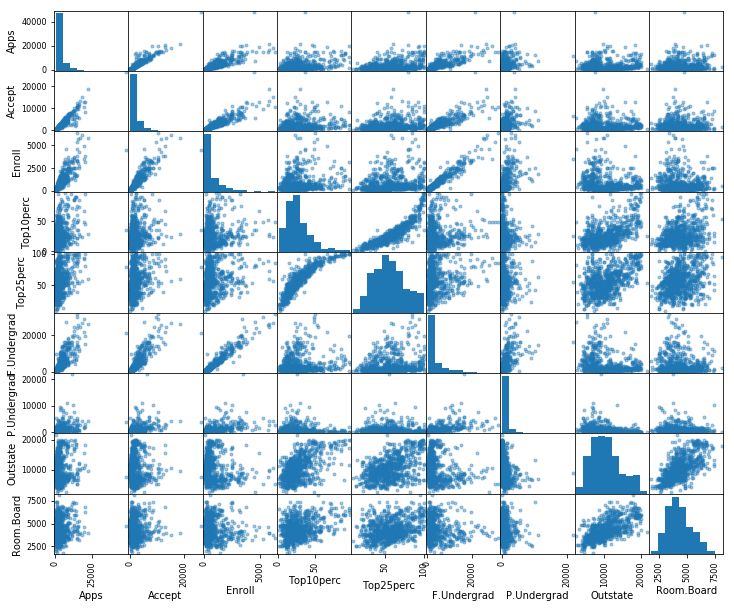

In [5]:
#c) ii
from pandas.tools.plotting import scatter_matrix
prim_diez=college.iloc[:,0:10]
scatter_matrix(prim_diez,alpha=0.4,diagonal='hist',figsize=(12,10))
plt.show()


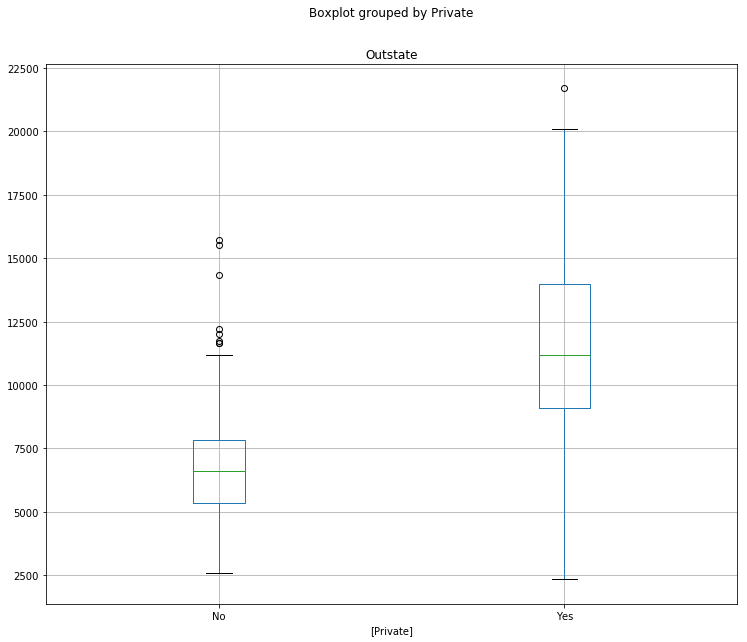

In [6]:
#c) iii
college[['Outstate','Private']].boxplot(by='Private',figsize=(12,10))
plt.show()

count     777
unique      2
top        No
freq      699
Name: Elite, dtype: object


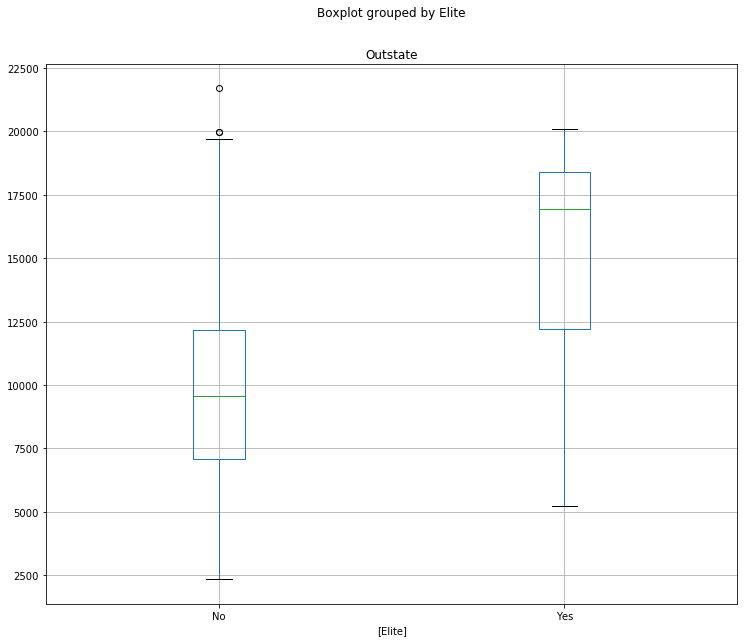

In [7]:
#c) iv
def elite_num1(row):
    if row['Top10perc']>50:
        val="Yes"
    elif row['Top10perc']<=50:
        val="No"
    else:
        val=()
    return val
college['Elite']=college.apply(elite_num1, axis=1)
college[['Top10perc','Elite']]
elite_est=college["Elite"].describe()
college[["Outstate","Elite"]].boxplot(by="Elite",figsize=(12,10))
print(elite_est)
plt.show()



In [8]:
college["Outstate"].describe()

count      777.000000
mean     10440.669241
std       4023.016484
min       2340.000000
25%       7320.000000
50%       9990.000000
75%      12925.000000
max      21700.000000
Name: Outstate, dtype: float64

In [9]:
#c) v
cuatro=college[['Accept','Enroll','Personal','Books']]
cuatro.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Personal,777.0,1340.642214,677.071454,250.0,850.0,1200.0,1700.0,6800.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


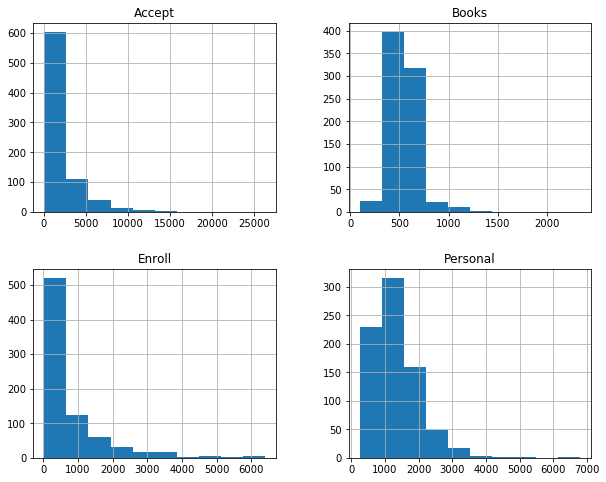

In [10]:
cuatro.hist(figsize=(10,8))
plt.show()

In [11]:
#######
#9
#a)
import pandas as pd
auto=pd.read_csv("C:\\Users\\ifmor\\Desktop\\Mineria de Datos\\Taller\\Taller 1\\Bases\\Auto.csv",na_values=["?"])
auto.shape

(397, 9)

In [12]:
auto.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [13]:
(auto.isnull()).sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [14]:
auto_1=auto.dropna()
(auto_1.isnull()).sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [15]:
auto_1
#a)
#Todas son cuantitativas a exepcion de name

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


In [16]:
#b)
auto_1.describe().loc[['min','max']].transpose()

,min,max
mpg,9.0,46.6
cylinders,3.0,8.0
displacement,68.0,455.0
horsepower,46.0,230.0
weight,1613.0,5140.0
acceleration,8.0,24.8
year,70.0,82.0
origin,1.0,3.0


In [17]:
#c)
auto_1.describe().loc[['mean','std']].transpose()

,mean,std
mpg,23.445918,7.805007
cylinders,5.471939,1.705783
displacement,194.411990,104.644004
horsepower,104.469388,38.491160
weight,2977.584184,849.402560
acceleration,15.541327,2.758864
year,75.979592,3.683737
origin,1.576531,0.805518


In [ ]:
auto_2=auto_1.drop(auto_1.index[10:85])
auto_2.describe().loc[["min","max","mean","std"]].transpose()

,min,max,mean,std
mpg,11.0,46.6,24.374763,7.872565
cylinders,3.0,8.0,5.381703,1.658135
displacement,68.0,455.0,187.880126,100.169973
horsepower,46.0,230.0,101.003155,36.003208
weight,1649.0,4997.0,2938.854890,811.640668
acceleration,8.5,24.8,15.704101,2.719913
year,70.0,82.0,77.123028,3.127158
origin,1.0,3.0,1.599369,0.819308


In [ ]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(auto_1,alpha=0.4,diagonal='hist',figsize=(12,10))
plt.show()


Existe una relación muy notable entre la variable mpg con displacement, horsepower y weight negativa.

# 2. Matriz Triangular
Escriba una función que reciba un número entero n y devuelva una matriz triangular superior 
donde las entradas no negativas sean enteros ordenados. Ej: para n=3 el resultado debe ser:
rbind(c(1,2,3),c(0,4,5),c(0,0,6))



In [ ]:
#2 
def triangular(n: int):
    x=1
    index=np.arange(0,n+1)
    A=np.zeros((n,n))
    while x<n:
        numero=1
        for i in range(1,n+1):
            for j in range(1,n+1):
                if i>j:
                    np.put(A[i-1],index[j-1],0)
                else:
                    np.put(A[i-1],index[j-1],numero)
                    numero=numero+1
        x=x+1
    return(np.array(A))

In [ ]:
z=triangular(5)
z

In [ ]:
z_1 , z_2= z[:,0],z[:,1:5]
print(z_1)
print(z_2)

z_3=z_2.transpose()
print(z_3)

In [ ]:
for i in range(7):
    print(triangular(i))


# 3. Regresión Lineal Múltiple
Escriba una función que reciba una matriz cuya primera 
columna responda a valores observados de una variable continua (variable objetivo o variable explicada) 
y las columnas restantes correspondan a las variables explicativas o features, en donde los resultados 
de la función sean los coeficientes de regresión lineal asociados. No olvide incluir de alguna manera 
información para calcular el intercepto.


In [ ]:
def regre_mat(M):
    filas=M.shape[0];
    columnas=M.shape[1];
    unos=np.ones((filas,1));
    y,x=M[:,0],M[:,1:columnas];
    x_1= np.c_[unos,x];
    xt=x_1.transpose();
    xtx=xt@x_1;
    inv=np.linalg.inv(xtx);
    beta=inv@xt@y;
    return(beta)